# BAFU dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [34]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl



# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/timeseries/"

# Set the directory:
os.chdir(PATH)

In [4]:
os.getcwd()

'c:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Scripts\\CAMELS_CH_chem'

# Import data
* Full table

In [5]:
# Full dataset
path = r'data\phys_daten_BAFU\phys_daten_BAFU\\'

filenames = glob.glob(path + "*.csv")
len(filenames)

423

In [6]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v2.xlsx", sheet_name='all_4')
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem.columns

Index(['basin_id', 'bafu_id', 'naduf_id', 'nawa_id', 'isot_id',
       'hydro_station', 'hydrowater_body', 'lon', 'lat', 'area_camels',
       'area_bafu', 'Q', 'level', 'remarks', 'temperature', 'pH',
       'conductivity', 'oxygen concentration', ' hydrogen-2', 'oxygen-18',
       'naduf_station', 'lon_naduf', 'lat_naduf', 'area_naduf',
       'bafu_naduf_distance', 'nawa_station', 'lon_nawa', 'lat_nawa',
       'area_nawa', 'bafu_nawa_distance', 'remarks.1'],
      dtype='object')

In [7]:
network_camels_ch_chem[["area_camels", "area_bafu"]]

,area_camels,area_bafu
0,5239.4,5238.08
1,3372.4,3372.39
2,11681.3,11681.18
3,3385.8,3385.74
4,555.2,555.15
...,...,...
111,128.6,128.46
112,93.3,93.32
113,478.3,478.27
114,8.9,8.95


In [8]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [9]:
# Read the shapefile of Switzerland
ch_shapefile = gpd.read_file(r'data\shps\switzerland.shp')
ch_shapefile

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [10]:
# Create GeoDataFrame, specifying the geometry column with Point objects (lon, lat)
network_camels_ch_chem_gdf = gpd.GeoDataFrame(network_camels_ch_chem, geometry=gpd.points_from_xy(network_camels_ch_chem['lon'], network_camels_ch_chem['lat']), crs="EPSG:21781")  # Swiss CH1903/LV03 CRS

# Convert to WGS84 (EPSG:4326)
network_camels_ch_chem_gdf = network_camels_ch_chem_gdf.to_crs("EPSG:4326")

network_camels_ch_chem_gdf["x_coord"] = network_camels_ch_chem_gdf.geometry.x
network_camels_ch_chem_gdf["y_coord"] = network_camels_ch_chem_gdf.geometry.y

network_camels_ch_chem_gdf.set_index("basin_id", inplace=True)

In [11]:
network_camels_ch_chem_gdf.y_coord.min()

45.97199536210988

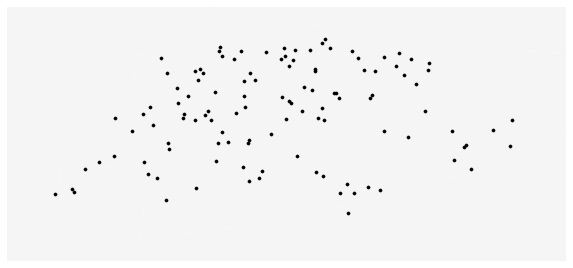

In [12]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Create a 2x1 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(8, 5))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='none', linewidth=0.1)
#axs.set_xlim(-24, 45) 
#axs.set_ylim(35, 70)  

#catchment_boundaries.plot(ax=axs, facecolor='None', edgecolor='royalblue', linewidth=0.05,  alpha=0.70)

axs.set_xlim(5.5, 11) 
axs.set_ylim(45.5, 48)  

# Plot the gauges
axs.scatter(network_camels_ch_chem_gdf['x_coord'], network_camels_ch_chem_gdf['y_coord'], color='black', edgecolor='black',linewidth=0.5,
            marker='o', s=10, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')

#axs.legend(['Streamflow gauges', 'Catchment boundaries'], loc='lower left', frameon=False)


# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.show()
#plt.savefig('results/figure1_pointsandboundaries.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

In [13]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_daily_df

100%|██████████| 87/87 [00:01<00:00, 65.38it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,17897,16360,16641,16574
2011,17897,16360,16641,16574
2016,17897,15501,15810,15467
2018,17897,8566,8778,8692
2019,17897,8566,8778,8692
...,...,...,...,...
2615,1678,15905,16430,16151
2617,7305,15905,16430,16151
2623,7305,7125,7289,7357


In [14]:
# Define the path where the CSV files are located
path = r"results/timeseries/hourly"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    temp_count = df['temp'].count()
    ec_count = df['EC'].count()
    o_count = df['o'].count()
    ph_count = df['ph'].count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_count, ph_count, ec_count, o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_hourly_df = pd.DataFrame(data, columns=['camels_id', 'temp_count', 'ph_count', 'EC_count', 'o_count']).set_index('camels_id')

counts_bafu_hourly_df

100%|██████████| 87/87 [00:27<00:00,  3.14it/s]


,temp_count,ph_count,EC_count,o_count
camels_id,,,,
2009,429505,394170,399294,397636
2011,429505,394170,399294,397636
2016,429505,378348,379168,371028
2018,429505,205707,210556,208466
2019,429505,205707,210556,208466
...,...,...,...,...
2615,40272,386580,394295,387672
2617,181177,386580,394295,387672
2623,175297,172272,174936,176592


In [15]:
# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values in each column
    delta_2h_count = df['delta_2h'].count()
    delta_18o_count = df['delta_18o'].count()

    # Store the results as a tuple (or list)
    data.append([file_number, delta_2h_count, delta_18o_count])

# Create a new DataFrame to store the counts, with the file number as the index
counts_isotopes_df = pd.DataFrame(data, columns=['camels_id', 'delta_2h_count', 'delta_18o_count']).set_index('camels_id')

counts_isotopes_df

100%|██████████| 9/9 [00:00<00:00, 165.91it/s]


,delta_2h_count,delta_18o_count
camels_id,,
2009,445,448
2016,434,437
2019,401,402
2030,300,301
2068,340,342
2174,157,157
2462,283,283
2473,382,385
2613,314,499


In [16]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NADUF"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 2  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Count the number of non-null values for all columns starting from the specified index
    counts = df.iloc[:, start_column_index:].count()
    
    # Store the file number and the counts as a row in the result
    row = [file_number] + counts.tolist()
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
columns = ['camels_id'] + df.columns[start_column_index:].tolist()  # Use the column names from the CSV file
counts_naduf_df = pd.DataFrame(data, columns=columns).set_index('camels_id')
counts_naduf_df

100%|██████████| 24/24 [00:00<00:00, 132.81it/s]


,q_mean,temp_water,ph,EC,phlab,EClab,OS,hardness,alkalinity,TN,...,mg,mn,na,ni,no3,o,pb,so4,sr,zn
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,1043,1043,1010,1021,939,946,1016,1014,1016,996,...,1015,0,1016,141,1016,1016,479,1016,0,487
2016,1043,1043,958,957,673,686,937,975,977,949,...,981,0,981,0,985,937,102,980,0,97
2018,417,417,378,391,386,381,388,382,383,389,...,387,0,389,0,389,388,25,389,0,46
2044,1027,1027,815,813,931,935,798,935,933,898,...,938,0,943,48,936,798,183,943,0,173
2067,196,186,0,0,191,190,0,191,191,173,...,191,0,190,0,190,0,0,192,0,0
2068,388,388,376,379,378,379,378,380,380,368,...,380,0,380,0,381,378,0,381,0,0
2085,677,677,578,579,644,646,567,647,647,633,...,645,0,647,0,648,567,0,648,0,0
2091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,477,477,0,0,462,463,0,464,464,444,...,463,0,464,122,462,0,232,465,0,248


In [17]:
csv_files

['results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2009.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2016.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2018.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2044.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2067.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2068.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2085.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2091.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2106.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2112.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2130.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2135.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2143.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2174.csv',
 'results/interval_samples/NADUF\\CAMELS_CH_Chem_naduf_2179.csv',
 'results/

In [18]:
len(data[5])

40

In [19]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NAWA"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []
all_columns = set()

# First pass: Collect all unique column names starting from the specified index
for file in tqdm.tqdm(csv_files):
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    # Collect all unique column names from the specified index
    all_columns.update(df.columns[start_column_index:])

# Convert the set of columns to a sorted list
all_columns = sorted(all_columns)

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, start_column_index:]
    
    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Count the non-null values and assign to the corresponding column
    for col in all_columns:
        row[col] = filtered_df[col].count() if col in filtered_df.columns else 0
    
    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
counts_nawa_df = pd.DataFrame(data).set_index('camels_id')

100%|██████████| 76/76 [00:00<00:00, 106.74it/s]


In [20]:
counts_nawa_df

,1_1_1_trichloroethane,1_1_2_2_tetrachloroethane,1_1_2_trichloroethane,1_1_dichloroethane,1_1_dichloroethene,1_2_3_trichlorobenzene,1_2_3_trimethylbenzene,1_2_4_trichlorobenzene,1_2_4_trimethylbenzene,1_2_dichlorobenzene,...,ti_dissolved,toluene,trans_1_2_dichloroethene,trans_1_3_dichloropropene,tribromomethane,trichloroethene,trichlorofluoromethane,turbidity,u_dissolved,zn_dissolved
camels_id,,,,,,,,,,,,,,,,,,,,,
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,89,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,0,0


## Now we can process some means

In [21]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))


    # Count the number of non-null values in each column
    temp_mean = df['temp'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean', 'ph_mean', 'EC_mean', 'o_mean']).set_index('camels_id')

mean_bafu_daily_df

100%|██████████| 87/87 [00:17<00:00,  5.05it/s]


,temp_mean,ph_mean,EC_mean,o_mean
camels_id,,,,
2009,7.297287,8.076862,289.301151,11.389236
2011,6.982739,8.076862,289.301151,11.389236
2016,11.914831,8.021953,375.411061,10.348721
2018,11.754490,8.044200,260.155044,10.383508
2019,5.951339,8.044200,260.155044,10.383508
...,...,...,...,...
2615,12.578869,8.024895,359.210641,10.586010
2617,5.731784,8.024895,359.210641,10.586010
2623,3.792242,7.867338,297.952191,9.693690


In [27]:
counts_naduf_df.columns

Index(['q_mean', 'temp_water', 'ph', 'EC', 'phlab', 'EClab', 'OS', 'hardness',
       'alkalinity', 'TN', 'DRP', 'TP', 'TFP', 'TOC', 'DOC', 'TSS', 'as', 'ba',
       'br', 'ca', 'cd', 'cl', 'cr', 'cu', 'fe', 'f', 'h4sio4', 'hg', 'k',
       'mg', 'mn', 'na', 'ni', 'no3', 'o', 'pb', 'so4', 'sr', 'zn'],
      dtype='object')

In [28]:
# Define the path where the CSV files are located
path = r"results/interval_samples/naduf"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))

    # Count the number of non-null values in each column
    temp_mean = df['temp_water'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:18<00:00,  1.29it/s]


,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
camels_id,,,,
2009,7.309847,8.085590,291.206835,11.440294
2016,11.988522,8.013375,378.061375,10.406077
2018,12.005156,8.102479,262.533371,10.357727
2044,10.829776,8.223337,484.142597,10.755680
2067,5.364746,NaN,NaN,NaN
2068,9.134923,7.810964,260.153860,11.209862
2085,12.105036,8.072446,340.717739,10.236686
2091,NaN,NaN,NaN,NaN
2106,10.809791,NaN,NaN,NaN


In [29]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))
    
    # Count the number of non-null values in each column
    temp_mean = df['temp_water'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']).set_index('camels_id')

mean_nawa_daily_df

100%|██████████| 76/76 [01:47<00:00,  1.41s/it]


,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,
2009,7.813830,8.177536,340.934532,11.453571
2011,7.436765,8.010839,294.164336,11.708394
2016,12.516197,8.059124,382.042336,10.525547
2018,12.595347,8.293056,269.819444,10.522917
2019,6.690323,8.183333,115.563978,11.808065
...,...,...,...,...
2493,9.205972,8.315164,440.173497,NaN
2610,9.692391,8.147826,414.760870,10.803986
2613,13.158194,8.079167,354.215972,10.609028


In [30]:
mean_daily_df = mean_bafu_daily_df.copy()
mean_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']] = mean_naduf_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']]
mean_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']] = mean_nawa_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']]

mean_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,,,,,,,,,,,
2009,7.297287,8.076862,289.301151,11.389236,46.349564,6.888617,7.309847,8.085590,291.206835,11.440294,7.813830,8.177536,340.934532,11.453571
2011,6.982739,8.076862,289.301151,11.389236,46.219089,7.357908,NaN,NaN,NaN,NaN,7.436765,8.010839,294.164336,11.708394
2016,11.914831,8.021953,375.411061,10.348721,47.482537,8.194880,11.988522,8.013375,378.061375,10.406077,12.516197,8.059124,382.042336,10.525547
2018,11.754490,8.044200,260.155044,10.383508,47.421030,8.271271,12.005156,8.102479,262.533371,10.357727,12.595347,8.293056,269.819444,10.522917
2019,5.951339,8.044200,260.155044,10.383508,46.745743,8.092031,NaN,NaN,NaN,NaN,6.690323,8.183333,115.563978,11.808065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,12.578869,8.024895,359.210641,10.586010,47.561717,7.586642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2617,5.731784,8.024895,359.210641,10.586010,46.629638,10.453157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2623,3.792242,7.867338,297.952191,9.693690,46.534322,8.349802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils.plots import add_circular_legend, plot_variable_subplot, generate_legend_and_color_mapping
import math

In [56]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'helvetica'  # Change the font family
mpl.rcParams['font.size'] = 16        # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

<AxesSubplot:>

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


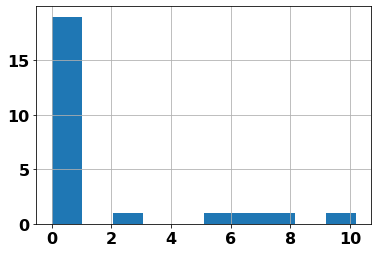

In [57]:
network_camels_ch_chem.bafu_naduf_distance.hist()

In [72]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawa_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_naduf_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

color_categories_hq_dur = [(-np.inf, 2), (2, 4), (4, 6), (6, 8), (8, np.inf)]
color_categories_lq_freq = [(-np.inf, 25), (25, 50), (50, 75), (75, 100), (100, np.inf)]
color_categories_lq_dur = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_p_mean = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_pet_mean = [(-np.inf, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, np.inf)]
color_categories_aridity = [(-np.inf, 0.5), (0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, np.inf)]
color_categories_p_seasonality = [(-np.inf, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 0.75), (0.75, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "bafu_nawa_distance": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_nawa_distance, 0, 2, 0.5, 10, color_palette='custom'),
    "bafu_naduf_distance": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_naduf_distance, 0, 2, 0.5, 10, color_palette='custom'),


    "hq_dur":  generate_legend_and_color_mapping("HQ dur. [days]", color_categories_hq_dur, 0, 30, 1, 10),
    "lq_freq":  generate_legend_and_color_mapping("LQ freq. [day/year]", color_categories_lq_freq, 0, 350, 50, 10, color_palette='custom'),
    "lq_dur":  generate_legend_and_color_mapping("LQ dur. [days]", color_categories_lq_dur, 0, 150, 1, 10, color_palette='custom'),
    "p_mean":  generate_legend_and_color_mapping("P [mm/day]", color_categories_p_mean, 0, 10, 1, 10, color_palette='blues'),
    "pet_mean":  generate_legend_and_color_mapping("PET [mm/day]", color_categories_pet_mean, 0, 10, 1, 10, color_palette='custom'),
    "aridity": generate_legend_and_color_mapping("Aridity [-]", color_categories_aridity, 0, 5, 1, 10, color_palette='custom'),
    "p_seasonality":  generate_legend_and_color_mapping("P-Seasonality [-]", color_categories_p_seasonality, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}




def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Create a histogram inset axis within the subplot
    hist_ax = ax.inset_axes([0.05, 0.15, 0.15, 0.175])  # Adjust the values as needed

    # Extract the data for the histogram
    hist_data = estreams_attributes[variable].dropna()

    # Plot the histogram with manually controlled uniform bins
    counts, bins, patches = hist_ax.hist(hist_data, bins=hist_bins, color='white', edgecolor='black', alpha=0.7, linewidth=0.4)

    # Assign colors based on color_categories to the bins
    for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
        # Iterate through color categories and check if the bin falls within the category
        for low, high in color_categories:
            if low <= bin_left < high:
                patch.set_facecolor(color_mapping[f'{low}-{high}'])
                break
        # For bins beyond the last threshold, use the color for the last defined category
        if bin_left >= color_categories[-1][0]:
            patch.set_facecolor(color_mapping[f'{color_categories[-1][0]}-{np.inf}'])

    # Hide the axis spines and ticks for the inset axis
    hist_ax.spines['top'].set_visible(False)
    hist_ax.spines['right'].set_visible(False)
    hist_ax.spines['left'].set_visible(True)
    hist_ax.spines['bottom'].set_visible(True)
    hist_ax.set_facecolor('none')
    hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=12)

    # Get the x-axis limits
    x_min, x_max = hist_ax.get_xlim()

    # Compute the midpoint of the x-axis
    middle_tick = (x_min + x_max) / 2

    # Set x-ticks to show only the middle tick
    hist_ax.set_xticks([middle_tick])

    # Set the label for the middle tick
    hist_ax.set_xticklabels([f'{middle_tick:.1f}'], fontsize=8, fontweight="bold")

    hist_ax.set_ylabel("Count", fontsize=8, fontweight="bold")

    # Set custom y-axis ticks to show automatically but label only the middle one
    y_ticks = hist_ax.get_yticks()
    mid_tick = y_ticks[len(y_ticks) // 2]
    hist_ax.set_yticks([mid_tick])  # Set only the middle tick
    hist_ax.set_yticklabels([f'{mid_tick:.0f}'], fontsize=8, fontweight="bold")

    # Call the function to add a circular legend
    add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [73]:
mean_bafu_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

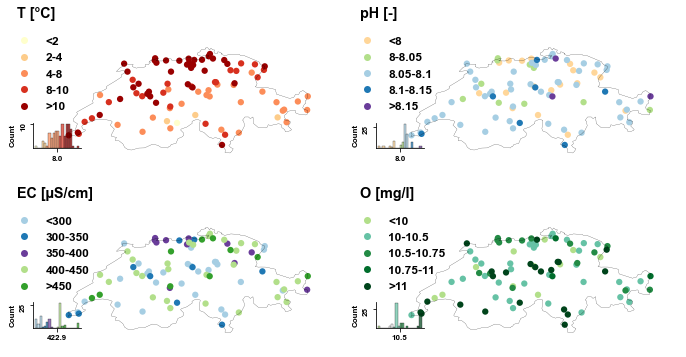

In [77]:
# List of variables
variable_list = ["temp_mean", "ph_mean", "EC_mean", "o_mean"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_bafu_daily_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_v02.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

,temp_mean,ph_mean,EC_mean,o_mean,lat,lon,geometry,color_category,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
camels_id,,,,,,,,,,,,
2009,7.309235,8.074447,289.671877,11.381961,46.349564,6.888617,POINT (6.88862 46.34956),4-8,7.331974,8.086416,290.946493,11.429468
2016,11.951728,8.016643,376.216648,10.413693,47.482537,8.194880,POINT (8.19488 47.48254),10-inf,12.050905,8.016090,378.188415,10.424246
2018,11.791203,8.047029,259.131009,10.344518,47.421030,8.271271,POINT (8.27127 47.42103),10-inf,12.050659,8.101378,262.453604,10.339424
2044,10.727570,8.228406,484.676912,10.754218,47.596523,8.681980,POINT (8.68198 47.59652),10-inf,10.862653,8.222887,483.017029,10.736399
2067,5.520395,8.228406,484.676912,10.754218,46.885784,10.465420,POINT (10.46542 46.88578),4-8,5.421894,NaN,NaN,NaN
2068,9.070457,7.808469,259.291146,11.213567,46.163386,8.910326,POINT (8.91033 46.16339),8-10,9.171399,7.812256,259.539569,11.217677
2085,11.768050,8.059490,337.111956,10.164493,47.055592,7.184345,POINT (7.18435 47.05559),10-inf,12.157995,8.073854,339.961334,10.230807
2091,12.283897,7.953208,367.310089,10.763025,47.560711,7.799896,POINT (7.79990 47.56071),NaN,NaN,NaN,NaN,NaN
2106,10.964754,7.953208,367.310089,10.763025,47.518322,7.618783,POINT (7.61878 47.51832),10-inf,10.843690,NaN,NaN,NaN


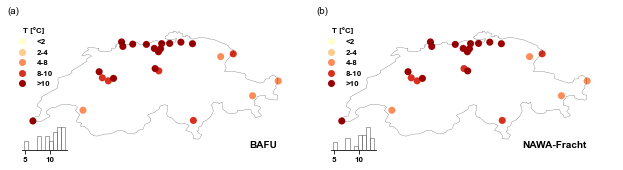

In [397]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_T_comparison_maps_naDUF.png', dpi=300, bbox_inches='tight')


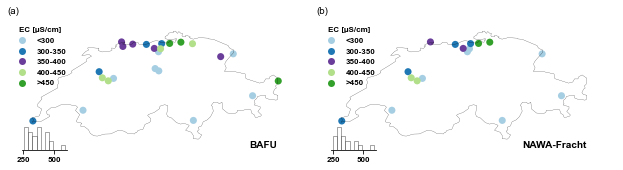

In [396]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_comparison_maps_naDUF.png', dpi=300, bbox_inches='tight')


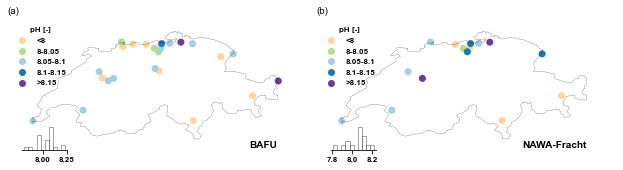

In [380]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

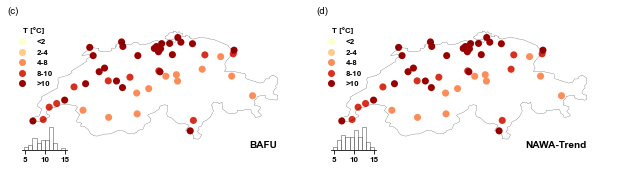

In [395]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_T_comparison_maps_nawa.png', dpi=300, bbox_inches='tight')


In [382]:
mean_daily_df[["temp_mean", "temp_mean_naduf", "temp_mean_nawa"]].corr()

,temp_mean,temp_mean_naduf,temp_mean_nawa
temp_mean,1.000000,0.989333,0.974194
temp_mean_naduf,0.989333,1.000000,0.972547
temp_mean_nawa,0.974194,0.972547,1.000000


In [383]:
mean_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa,lat,lon
temp_mean,1.000000,0.012079,-0.009242,0.034931,0.989333,0.198936,0.353995,-0.456665,0.974194,0.162681,0.447725,-0.698845,0.501924,-0.383678
ph_mean,0.012079,1.000000,0.317189,0.267072,0.028930,0.872771,0.369501,-0.007110,0.216536,0.057491,0.142727,-0.353707,-0.087271,-0.044877
EC_mean,-0.009242,0.317189,1.000000,-0.433422,0.175399,0.243596,0.930079,-0.398266,0.158783,0.279408,0.363101,-0.005201,0.119229,0.072960
o_mean,0.034931,0.267072,-0.433422,1.000000,-0.344702,0.001012,-0.325204,0.938969,-0.193989,-0.131704,-0.183367,0.126692,-0.182268,-0.104392
temp_mean_naduf,0.989333,0.028930,0.175399,-0.344702,1.000000,0.240531,0.359985,-0.448336,0.972547,0.086965,0.326856,-0.478506,0.468266,-0.573730
ph_mean_naduf,0.198936,0.872771,0.243596,0.001012,0.240531,1.000000,0.396994,0.159371,0.221945,0.755128,0.496991,-0.216398,0.374914,-0.241622
EC_mean_naduf,0.353995,0.369501,0.930079,-0.325204,0.359985,0.396994,1.000000,-0.222642,0.318323,0.485068,0.988565,-0.163345,0.410883,-0.100573
o_mean_naduf,-0.456665,-0.007110,-0.398266,0.938969,-0.448336,0.159371,-0.222642,1.000000,-0.440817,-0.232938,-0.181972,0.888451,-0.263147,0.123504
temp_mean_nawa,0.974194,0.216536,0.158783,-0.193989,0.972547,0.221945,0.318323,-0.440817,1.000000,0.116919,0.346879,-0.697375,0.396259,-0.155738
ph_mean_nawa,0.162681,0.057491,0.279408,-0.131704,0.086965,0.755128,0.485068,-0.232938,0.116919,1.000000,0.191577,-0.018017,0.175317,-0.030963


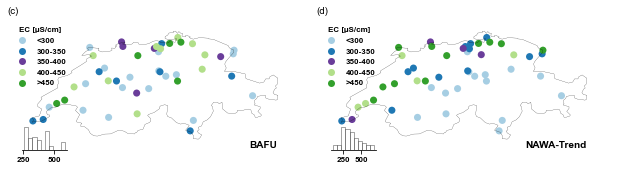

In [394]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_comparison_maps_nawa.png', dpi=300, bbox_inches='tight')


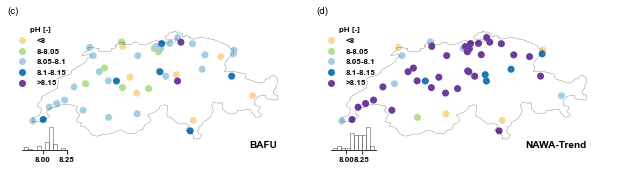

In [385]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

# Make a plot with the time-series

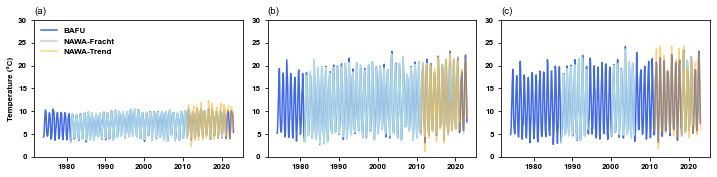

In [408]:
# List of basins to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['temp'], label='BAFU', color='royalblue')
    axes[i].plot(naduf_daily.index, naduf_daily['temp_water'], label='NAWA-Fracht', color='lightblue')
    axes[i].plot(nawa_daily.index, nawa_daily['temp_water'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(97+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('Temperature (°C)')
        axes[i].legend(frameon=False, loc="upper left")
        
    axes[i].grid(False)
    axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_T_timeseries.png', dpi=300, bbox_inches='tight')


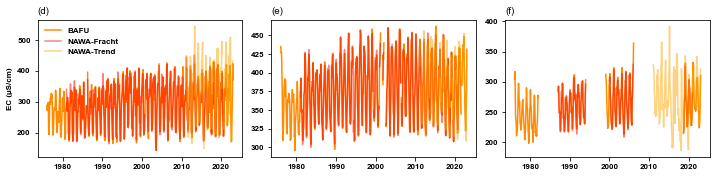

In [407]:
# List of basins to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['EC'], label='BAFU', color='darkorange')
    axes[i].plot(naduf_daily.index, naduf_daily['EC'], label='NAWA-Fracht', color='red', alpha=0.5)
    axes[i].plot(nawa_daily.index, nawa_daily['EC'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(100+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('EC (µS/cm)')
        axes[i].legend(frameon=False, loc="upper left")
    
    axes[i].grid(False)
    #axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_timeseries.png', dpi=300, bbox_inches='tight')


In [338]:
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (557660.000 133280.000)
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (593770.000 118630.000)
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (657000.000 259360.000)
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (662830.000 252580.000)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (649930.000 177380.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (830800.000 168700.000)
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (669900.000 154075.000)
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (663700.000 213630.000)
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (700710.000 218125.000)


# Count number of measurments (variables)

In [121]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
counts_datasets_df = pd.DataFrame(data, columns=['camels_id', 'count_bafu']).set_index('camels_id')

counts_datasets_df

100%|██████████| 87/87 [00:05<00:00, 14.60it/s]


,count_bafu
camels_id,
2009,4
2011,4
2016,4
2018,4
2019,4
...,...
2615,4
2617,4
2623,4


In [122]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NADUF"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_naduf"] = data_df["count"]

counts_datasets_df

100%|██████████| 24/24 [00:00<00:00, 36.46it/s]


,count_bafu,count_naduf
camels_id,,
2009,4,35.0
2011,4,NaN
2016,4,32.0
2018,4,32.0
2019,4,NaN
...,...,...
2615,4,NaN
2617,4,NaN
2623,4,NaN


In [123]:
# Define the path where the CSV files are located
path = r"results/interval_samples/NAWA"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_nawa"] = data_df["count"]

counts_datasets_df

100%|██████████| 76/76 [00:02<00:00, 26.60it/s]


,count_bafu,count_naduf,count_nawa
camels_id,,,
2009,4,35.0,19.0
2011,4,NaN,20.0
2016,4,32.0,22.0
2018,4,32.0,20.0
2019,4,NaN,21.0
...,...,...,...
2615,4,NaN,NaN
2617,4,NaN,NaN
2623,4,NaN,NaN


In [136]:
# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_isot"] = data_df["count"]

counts_datasets_df

100%|██████████| 9/9 [00:00<00:00, 91.74it/s]


,count_bafu,count_naduf,count_nawa,lat,lon,geometry,color_category,count_isot
camels_id,,,,,,,,
2009,4,35.0,19.0,46.349564,6.888617,POINT (6.88862 46.34956),-inf-20,2.0
2011,4,NaN,20.0,46.219089,7.357908,POINT (7.35791 46.21909),-inf-20,NaN
2016,4,32.0,22.0,47.482537,8.194880,POINT (8.19488 47.48254),20-22,2.0
2018,4,32.0,20.0,47.421030,8.271271,POINT (8.27127 47.42103),-inf-20,NaN
2019,4,NaN,21.0,46.745743,8.092031,POINT (8.09203 46.74574),20-22,2.0
...,...,...,...,...,...,...,...,...
2615,4,NaN,NaN,47.561717,7.586642,POINT (7.58664 47.56172),NaN,NaN
2617,4,NaN,NaN,46.629638,10.453157,POINT (10.45316 46.62964),NaN,NaN
2623,4,NaN,NaN,46.534322,8.349802,POINT (8.34980 46.53432),NaN,NaN


In [137]:
counts_datasets_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]
counts_datasets_df

,count_bafu,count_naduf,count_nawa,lat,lon,geometry,color_category,count_isot
camels_id,,,,,,,,
2009,4,35.0,19.0,46.349564,6.888617,POINT (6.88862 46.34956),-inf-20,2.0
2011,4,NaN,20.0,46.219089,7.357908,POINT (7.35791 46.21909),-inf-20,NaN
2016,4,32.0,22.0,47.482537,8.194880,POINT (8.19488 47.48254),20-22,2.0
2018,4,32.0,20.0,47.421030,8.271271,POINT (8.27127 47.42103),-inf-20,NaN
2019,4,NaN,21.0,46.745743,8.092031,POINT (8.09203 46.74574),20-22,2.0
...,...,...,...,...,...,...,...,...
2615,4,NaN,NaN,47.561717,7.586642,POINT (7.58664 47.56172),NaN,NaN
2617,4,NaN,NaN,46.629638,10.453157,POINT (10.45316 46.62964),NaN,NaN
2623,4,NaN,NaN,46.534322,8.349802,POINT (8.34980 46.53432),NaN,NaN


In [143]:
river_ch = gpd.read_file('data/shps/rivers_ch_dissolved.shp')
river_ch

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,21000049,18.849608,13.158794,1.432472,0.003752,237.841082,2,70.8,0.003752,21000042,2,21000331,21000340,0,0,"MULTILINESTRING ((5.96154 46.13500, 5.96167 46..."


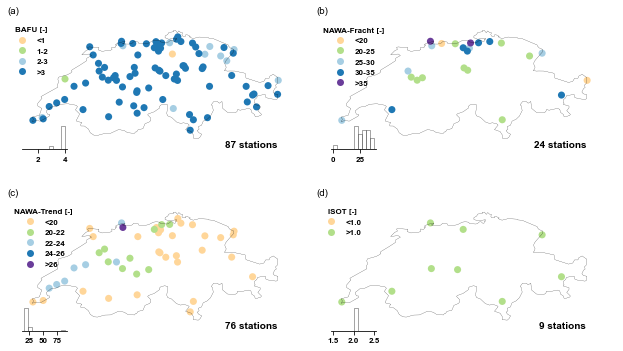

In [399]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    #river_ch.plot(ax=axs[i], linewidth=0.25)
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()
 
# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_number_of_stations.png', dpi=300, bbox_inches='tight')


# Distance between obeservation points

In [218]:
network_camels_ch_chem[network_camels_ch_chem.bafu_naduf_distance>0]

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
14,2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,1613.3,...,113500.0,1613.3,10.2,Riazzino,713670.0,113500.0,1613.268070,0.0,NaN,POINT (713670.000 113500.000)
51,2243,2243.0,1836.0,1345.0,NaN,"Baden, Limmatpromenade",Limmat,665640,258690,2393.7,...,260770.0,2412.0,7.1,Turgi,661300.0,260850.0,2412.382874,6.7,NaN,POINT (665640.000 258690.000)
88,2462,2462.0,2064.0,2064.0,NIO06,S-chanf,Inn,795800,165910,616.0,...,165910.0,616.0,3.0,S-chanf,795800.0,165910.0,615.950719,0.0,NaN,POINT (795800.000 165910.000)
89,2467,2467.0,1831.0,NaN,NaN,Gümmenen,Saane,585100,199240,1881.3,...,199240.0,1881.3,5.3,NaN,NaN,NaN,NaN,NaN,NaN,POINT (585100.000 199240.000)
109,2613,2613.0,2078.0,2078.0,NIO08,"Weil, Palmrainbrücke (D)",Rhein,611740,272310,36404.4,...,272310.0,36404.4,7.2,"Weil, Palmrainbrücke",611740.0,272310.0,36404.416302,0.0,NaN,POINT (611740.000 272310.000)


In [219]:
network_camels_ch_chem[network_camels_ch_chem.bafu_nawa_distance>0]

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (662830.000 252580.000)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (649930.000 177380.000)
5,2029,2029.0,NaN,1142.0,NaN,"Brügg, Aegerten",Aare,588220,219020,8248.6,...,NaN,NaN,NaN,Nidau,584709.0,219090.0,8243.100000,3.8,NaN,POINT (588220.000 219020.000)
6,2030,2030.0,NaN,1145.0,NIO07,Thun,Aare,613230,179280,2459.3,...,NaN,NaN,NaN,Thun Schadau,615219.0,177345.0,2451.536407,3.2,NaN,POINT (613230.000 179280.000)
8,2034,2034.0,NaN,1432.0,NaN,"Payerne, Caserne d'aviation",Broye,561660,187320,415.9,...,NaN,NaN,NaN,Domdidier,566187.0,191947.0,428.900220,6.6,NaN,POINT (561660.000 187320.000)
9,2044,2044.0,1823.0,1044.0,NaN,Andelfingen,Thur,693510,272500,1701.6,...,272500.0,1701.6,0.0,Vor ARA Andelfingen,693086.0,272856.0,1701.627120,0.6,NaN,POINT (693510.000 272500.000)
11,2056,2056.0,NaN,4922.0,NaN,Seedorf,Reuss,690085,193210,833.2,...,NaN,NaN,NaN,"Attinghausen, Allmeinigärtli",690740.0,191720.0,818.855513,1.6,NaN,POINT (690085.000 193210.000)
12,2063,NaN,NaN,1108.0,NaN,Murgenthal,Aare,629665,235150,10059.4,...,NaN,NaN,NaN,Murgenthal,629760.0,235242.0,10059.355199,0.3,NaN,POINT (629665.000 235150.000)
15,2070,2070.0,NaN,1162.0,NaN,Emmenmatt,Emme,623610,200420,443.0,...,NaN,NaN,NaN,"Emmenmatt, Mitte",623700.0,199790.0,230.974056,0.7,Q is calculated by id_2070 minus id_2603,POINT (623610.000 200420.000)
19,2099,NaN,NaN,1053.0,NaN,"Zürich, Unterhard",Limmat,682055,249430,2173.9,...,NaN,NaN,NaN,Hönggersteg,679609.0,250356.0,2186.067125,2.7,NaN,POINT (682055.000 249430.000)


In [224]:
((network_camels_ch_chem.area_nawa - network_camels_ch_chem.area_camels)/network_camels_ch_chem.area_camels).max()

0.4199422502043134

<AxesSubplot:>

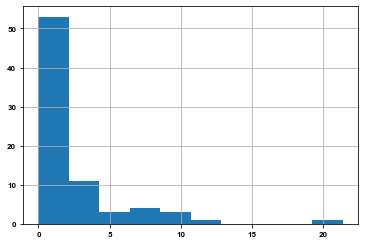

In [225]:
network_camels_ch_chem.bafu_nawa_distance.hist()

<AxesSubplot:>

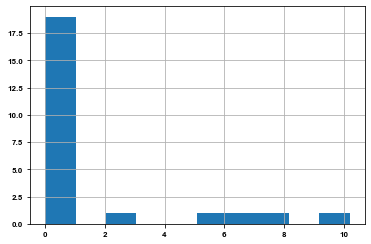

In [226]:
network_camels_ch_chem.bafu_naduf_distance.hist()

In [232]:
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

In [233]:
network_camels_ch_chem_gdf

,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,area_bafu,...,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry,x_coord,y_coord
basin_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,6.888617,46.349564,5239.4,5238.08,...,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (6.88862 46.34956),6.888617,46.349564
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,7.357908,46.219089,3372.4,3372.39,...,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (7.35791 46.21909),7.357908,46.219089
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,8.194880,47.482537,11681.3,11681.18,...,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (8.19488 47.48254),8.194880,47.482537
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,8.271271,47.421030,3385.8,3385.74,...,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (8.27127 47.42103),8.271271,47.421030
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,8.092031,46.745743,555.2,555.15,...,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (8.09203 46.74574),8.092031,46.745743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,10.453157,46.629638,128.6,128.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (10.45316 46.62964),10.453157,46.629638
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,8.349802,46.534322,93.3,93.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (8.34980 46.53432),8.349802,46.534322
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,8.277285,47.070628,478.3,478.27,...,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (8.27728 47.07063),8.277285,47.070628


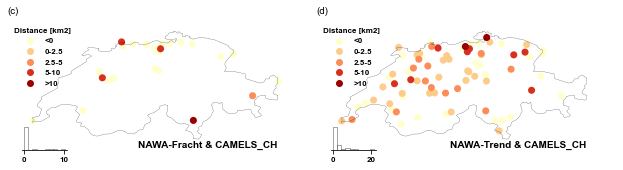

In [241]:
#mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["bafu_naduf_distance", "bafu_nawa_distance"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["NAWA-Fracht & CAMELS_CH", "NAWA-Trend & CAMELS_CH"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

In [418]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_naduf_distance > 10]

,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,area_bafu,...,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry,x_coord,y_coord,color_category
basin_id,,,,,,,,,,,,,,,,,,,,,
2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,8.910326,46.163386,1613.3,1613.23,...,Riazzino,713670.0,113500.0,1613.26807,0.0,NaN,POINT (8.91033 46.16339),8.910326,46.163386,-inf-0


In [415]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawa_distance > 5]

,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,area_bafu,...,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry,x_coord,y_coord,color_category
basin_id,,,,,,,,,,,,,,,,,,,,,
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,8.271271,47.421030,3385.8,3385.74,...,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (8.27127 47.42103),8.271271,47.421030,5-10
2034,2034.0,NaN,1432.0,NaN,"Payerne, Caserne d'aviation",Broye,6.936070,46.835913,415.9,415.93,...,Domdidier,566187.0,191947.0,428.900220,6.6,NaN,POINT (6.93607 46.83591),6.936070,46.835913,5-10
2202,NaN,NaN,1307.0,NaN,Liestal,Ergolz,7.734121,47.488136,261.2,261.22,...,"Augst, Autobahn",620950.0,264930.0,284.647126,5.9,NaN,POINT (7.73412 47.48814),7.734121,47.488136,5-10
2205,2205.0,NaN,1344.0,NaN,"Untersiggenthal, Stilli",Aare,8.234796,47.516628,17553.3,17553.22,...,Felsenau,658950.0,273050.0,17709.136257,12.2,NaN,POINT (8.23480 47.51663),8.234796,47.516628,10-inf
2215,NaN,NaN,1912.0,NaN,Laupen,Saane,7.234396,46.908621,1861.8,1861.79,...,Marfeldingen,585905.0,203017.0,1892.862106,8.8,NaN,POINT (7.23440 46.90862),7.234396,46.908621,5-10
2243,2243.0,1836.0,1345.0,NaN,"Baden, Limmatpromenade",Limmat,8.309405,47.475706,2393.7,2393.67,...,Turgi,661300.0,260850.0,2412.382874,6.7,NaN,POINT (8.30941 47.47571),8.309405,47.475706,5-10
2288,2288.0,NaN,1318.0,NaN,"Neuhausen, Flurlingerbrücke",Rhein,8.625855,47.682334,11882.2,11929.59,...,Stein am Rhein,706700.0,279600.0,11485.039258,21.4,NaN,POINT (8.62586 47.68233),8.625855,47.682334,10-inf
2374,2374.0,NaN,2991.0,NaN,"Mogelsberg, Aachsäge",Necker,9.121434,47.364189,88.1,88.10,...,"Ob Thur, Lütisburg",724320.0,250420.0,125.096912,7.6,NaN,POINT (9.12143 47.36419),9.121434,47.364189,5-10
2387,NaN,NaN,6055.0,NaN,Fürstenau,Hinterrhein,9.447342,46.715086,1576.9,1576.85,...,Rothenbrunnen,751350.0,181750.0,1663.695398,6.5,NaN,POINT (9.44734 46.71509),9.447342,46.715086,5-10


In [417]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawa_distance > 10]

,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,area_bafu,...,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry,x_coord,y_coord,color_category
basin_id,,,,,,,,,,,,,,,,,,,,,
2205,2205.0,NaN,1344.0,NaN,"Untersiggenthal, Stilli",Aare,8.234796,47.516628,17553.3,17553.22,...,Felsenau,658950.0,273050.0,17709.136257,12.2,NaN,POINT (8.23480 47.51663),8.234796,47.516628,10-inf
2288,2288.0,NaN,1318.0,NaN,"Neuhausen, Flurlingerbrücke",Rhein,8.625855,47.682334,11882.2,11929.59,...,Stein am Rhein,706700.0,279600.0,11485.039258,21.4,NaN,POINT (8.62586 47.68233),8.625855,47.682334,10-inf


# Isotopes

100%|██████████| 9/9 [00:00<00:00, 193.37it/s]


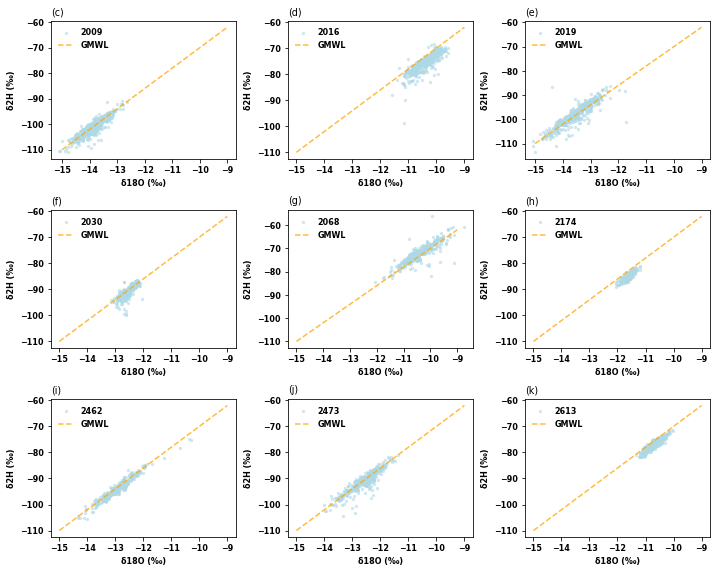

In [302]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tqdm


# Set font properties using rcParams
mpl.rcParams['font.family'] = 'helvetica'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Function to extract basin_id from the filename
def get_basin_id_from_filename(filename):
    basename = os.path.basename(filename)
    # Assuming the basin_id is the last part of the file name before ".csv"
    basin_id = basename.split('_')[-1].split('.')[0]
    return basin_id


# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize the number of rows and columns for subplots
num_plots = 9  # Number of subplots (e.g., 9)
nrows = 3  # 3 rows
ncols = 3  # 3 columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each CSV file and create a subplot
for i, file in enumerate(tqdm.tqdm(csv_files[:num_plots])):  # Only process the first 9 files
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Extract the basin_id
    basin_id = get_basin_id_from_filename(file)

    # Extract the relevant columns (assuming they are named 'delta_18o' and 'delta_2h')
    delta_18o = df['delta_18o']
    delta_2h = df['delta_2h']

    # Plot δ2H vs δ18O for your data on the current axis
    axes[i].scatter(delta_18o, delta_2h, label=f'{basin_id}', color='lightblue', marker='o', s=5, alpha=0.5)

    # Plot the Global Meteoric Water Line (GMWL) on the current axis
    gmwl_d18O = range(-15, -8)  # Adjust the range based on your δ18O values
    gmwl_d2H = [8 * d18O + 10 for d18O in gmwl_d18O]
    axes[i].plot(gmwl_d18O, gmwl_d2H, label='GMWL', color='orange', linestyle='--', alpha=0.75)

    # Set labels, title, and limits for each subplot
    axes[i].set_xlabel('δ18O (‰)')
    axes[i].set_ylabel('δ2H (‰)')
    axes[i].set_title(f'({chr(99+i)})', loc="left")
    #axes[i].grid(True)
    axes[i].legend(frameon=False)
    #axes[i].set_xlim(-15, -8)
    #axes[i].set_ylim(-110, -80)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_tv_isotopes.png', dpi=300, bbox_inches='tight')


In [279]:
file

'results/interval_samples/isotopes\\CAMELS_CH_Chem_isotopes_2613.csv'

# End